In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#set datadir based on cwd
cwd = os.getcwd()
#OSX
datadir = cwd + '/data/'
raw = pd.read_csv(datadir+'raw.csv')

In [2]:
df = raw.drop(['defendantid','NewArrests36','NewFelArrests36', 'NewMisdArrests36', 'NewViolArrests36','NewArrest36', 'NewFelArrest36', 'NewMisdArrest36', 'NewViolArrest36'],axis = 1)

#created binary target variable
#classified target variable as multi-class
df['NewArrest36Type'] = df['NewArrest36Type'].apply(lambda x:0 if x == 'None' else (1 if x =='Misdemeanor' else (2 if x == 'Non-Violent Felony' else 3)) )

In [3]:
#Step 1: drop all columns with 10 and 9. We only look at data within 5 years
for i in df.columns:
    if '10' in i or '9' in i:
        df = df.drop(i,axis = 1)
        
#Step 2: drop features based on domain knowledge
df = df.drop(['CareerLength','MajorGroupDetail','CvtTypes'],axis = 1)

In [4]:
#some cleaning
df['race'] = df['race'].apply(lambda x: 'Unknown' if x == 'Unsure' else x)
#check missing value
df.isnull().sum()

gender                   0
race                     4
category               191
AgeAtFirst           47661
OrderProtect             0
Housing                  0
Age                    147
MisdConviction           0
FelonyConviction         0
ViolentConviction        0
ViolentOffense           0
Gang                     0
BWO24                    0
BWO24Plus                0
Arrests                  0
FelArrests               0
MisdArrests              0
ViolArrests              0
Arrests5                 0
FelArrests5              0
MisdArrests5             0
ViolArrests5             0
Cvts                     0
FelCvts                  0
MisdCvts                 0
ViolCvts                 0
DrugCvts                 0
DrugFelCvts              0
SexCvts                  0
BurgFelCvts              0
RobFelCvts               0
LarcFelCvts              0
AssFelCvts               0
WeapFelCvts              0
Cvts5                    0
CvtCounties              0
FelCvts5                 0
M

In [5]:
#Fill missing values 
df['category'] = df['category'].fillna('Unspecified')
#Two main cols with missing values are AgeAtFirst and CvtDensity. Based on the data source, we replace the NA with appropriate value
df.AgeAtFirst = df.AgeAtFirst.combine_first(df.Age)
df.CvtDensity = df.CvtDensity.replace(np.nan,0)

#drop na values and check missing values again
df = df.dropna()
df.isnull().sum()

gender               0
race                 0
category             0
AgeAtFirst           0
OrderProtect         0
Housing              0
Age                  0
MisdConviction       0
FelonyConviction     0
ViolentConviction    0
ViolentOffense       0
Gang                 0
BWO24                0
BWO24Plus            0
Arrests              0
FelArrests           0
MisdArrests          0
ViolArrests          0
Arrests5             0
FelArrests5          0
MisdArrests5         0
ViolArrests5         0
Cvts                 0
FelCvts              0
MisdCvts             0
ViolCvts             0
DrugCvts             0
DrugFelCvts          0
SexCvts              0
BurgFelCvts          0
RobFelCvts           0
LarcFelCvts          0
AssFelCvts           0
WeapFelCvts          0
Cvts5                0
CvtCounties          0
FelCvts5             0
MisdCvts5            0
ViolCvts5            0
DrugCvts5            0
CvtTypes5            0
CvtCounties5         0
Incarcerations       0
Jail       

In [6]:
#Step 3: get dummy variables to multi-class features and make binary class features to (1,0)
cols_to_transform = ['race', 'category']
df = pd.get_dummies(df,columns = cols_to_transform) 
df['gender'] = df['gender'].apply(lambda x:1 if x == 'F' else 0)

#Step 4: make some change to specific columns
#switch 1,0 for housing col 
df['Housing'] = df['Housing'].apply(lambda x: 1  if x==0 else 0)

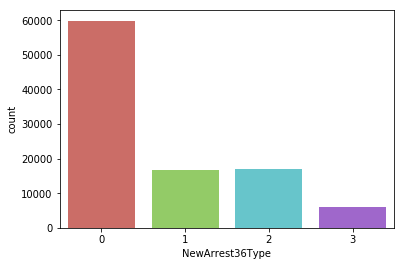

In [7]:
sns.countplot(x='NewArrest36Type',data = df,palette='hls')
plt.show()

This is not a balanced dataset

In [16]:
target = 'NewArrest36Type'
train_df = df.sample(frac=0.7, replace=False)
test_df = df[~df.index.isin(train_df.index)]
#check if train_df and test_df overlap
if(len(train_df) + len(test_df) == len(df)):
    #Set up X Y
    X_train = train_df.drop(target, 1)
    Y_train = train_df[target]
    X_test = test_df.drop(target, 1)
    Y_test = test_df[target]
    train_samples = len(train_df)
else:
    print("Check sample split")

In [29]:
clf = LogisticRegression(multi_class='multinomial',solver='newton-cg')
clf.fit(X_train, Y_train)
yhat = clf.predict(X_test)
accuracy_score(Y_test, yhat)

0.68994525303778875

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.transform(X_test)

clf1 = LogisticRegression(multi_class='multinomial',solver='sag',tol=0.1)
clf1.fit(X_train_1, Y_train)
yhat = clf1.predict(X_test_1)
accuracy_score(Y_test, yhat)

0.69007878221391372